In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data= pd.read_csv('iris.txt')
data.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data.head(4)

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data['class'] = pd.Categorical(pd.factorize(data['class'])[0]+1)
data.head(4)

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,1
1,4.7,3.2,1.3,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1


In [3]:
data = data.sample(frac=1, random_state=11).reset_index(drop=True)
data.head(4)

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.8,3.0,5.5,2.1,3
1,6.8,2.8,4.8,1.4,2
2,6.4,3.1,5.5,1.8,3
3,4.9,2.4,3.3,1.0,2


In [4]:
data_x = data.iloc[:,:4]
data_y = data.iloc[:,4]
data_x.head(4)

,sepal-length,sepal-width,petal-length,petal-width
0,6.8,3.0,5.5,2.1
1,6.8,2.8,4.8,1.4
2,6.4,3.1,5.5,1.8
3,4.9,2.4,3.3,1.0


In [5]:
data_y.head(4)

0    3
1    2
2    3
3    2
Name: class, dtype: category
Categories (3, int64): [1, 2, 3]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_x)
data_x = scaler.transform(data_x)
data_x[0:4]

array([[ 1.15241904, -0.11805969,  0.98390123,  1.17911148],
       [ 1.15241904, -0.58097793,  0.58475344,  0.25652088],
       [ 0.66804545,  0.11339944,  0.98390123,  0.78371551],
       [-1.1483555 , -1.50681441, -0.27056327, -0.27067375]])

In [7]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, shuffle=False)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lr.intercept_

2.010388470646838

In [10]:
lr.coef_

array([-0.07307615, -0.04611761,  0.36530893,  0.46516186])

In [11]:
predicted_y = lr.predict(test_x)
predicted_y[0:5]

array([2.01455924, 3.20112896, 2.27742235, 3.10324184, 2.332101  ])

In [12]:
np.array(test_y[0:5])

array([2, 3, 2, 3, 2])

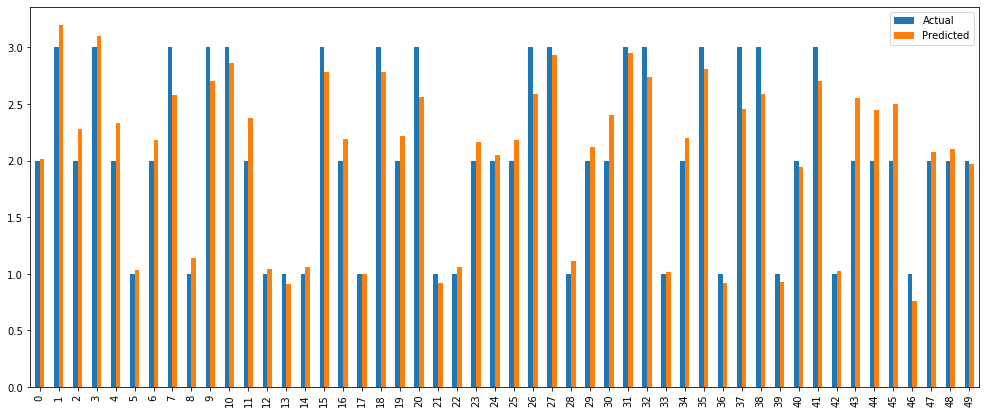

In [13]:
df = pd.DataFrame({'Actual': np.array(test_y), 'Predicted': predicted_y})
df.plot(figsize=(17,7), kind='bar')
plt.show()

In [14]:
from sklearn import metrics
meanAbsError = metrics.mean_absolute_error(np.array(test_y), predicted_y)
meanSqrdError = metrics.mean_squared_error(np.array(test_y), predicted_y)
rootMeanSqrdError = np.sqrt(meanSqrdError)

print(meanAbsError)
print(meanSqrdError)
print(rootMeanSqrdError)

0.19593957823436037
0.06171808577849876
0.2484312496013711


In [15]:
predicted2_y = list(map(lambda new: round(new), predicted_y))
predicted2_y[0:5]

[2.0, 3.0, 2.0, 3.0, 2.0]

In [16]:
np.array(test_y[0:5])

array([2, 3, 2, 3, 2])

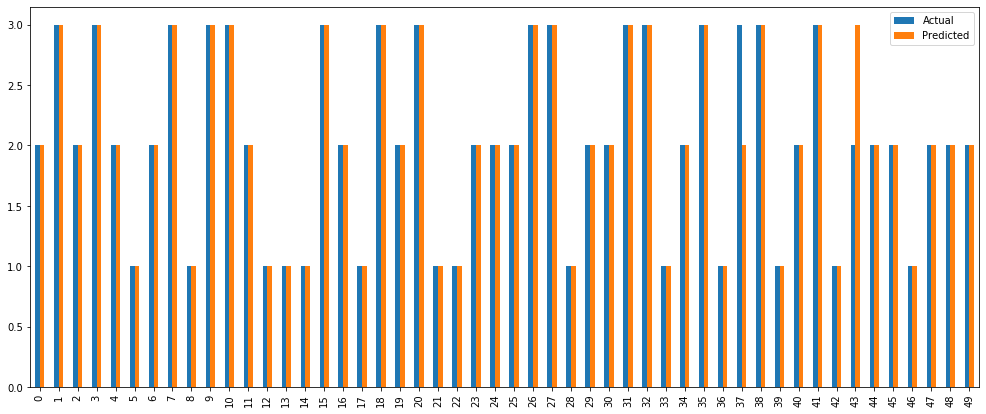

In [17]:
df = pd.DataFrame({'Actual': np.array(test_y), 'Predicted': predicted2_y})
df.plot(figsize=(17,7), kind='bar')
plt.show()

In [18]:
from sklearn import metrics
meanAbsError = metrics.mean_absolute_error(np.array(test_y), predicted2_y)
meanSqrdError = metrics.mean_squared_error(np.array(test_y), predicted2_y)
rootMeanSqrdError = np.sqrt(meanSqrdError)

print(meanAbsError)
print(meanSqrdError)
print(rootMeanSqrdError)

0.04
0.04
0.2
